In [1]:
#Kittipong Wangnok
#School of Physics, Institute of Science, Suranaree University of Technology
#Import module
import sys
import os
import numpy as np
np.seterr(divide='ignore', invalid='ignore')
from matplotlib import pyplot as plt

from matplotlib import rc
rc('text', usetex=True)
rc('font', family='serif',size=14)

In [2]:
ls

Schwope2002_Figure7_Schwope_ephemeris_lnquad.ipynb*
Schwope_ephemeris_determination_linear.pdf
interporate_lnquad_fit.out
interporate_lnquad_fit_Figure7.out
oc_dpleo_Schwope_2002.inp*
oc_linear_dpleo_Beuermann_Schwope_Kittipong_ephemeris_determination.txt


In [3]:
#Read data ---#1
Input = "oc_dpleo_Schwope_2002.inp"
Data   = np.genfromtxt(Input)

Epoch = Data[:,0]
T_obs = Data[:,1]
T_obs_err = Data[:,2]

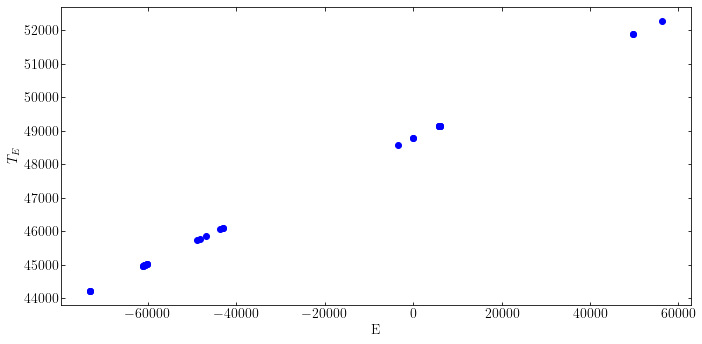

In [4]:
fig, (ax0) = plt.subplots(1, 1, sharex=True, sharey=False, figsize=(10, 5), tight_layout=True)
#plt.xlim(-0.04,0.04)
#plt.xlabel('Orbital phase')

ax0.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')
#ax1.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')

ax0.errorbar(Epoch, T_obs, yerr= T_obs_err, fmt='o', color='blue',
             ecolor='lightgray', elinewidth=1, capsize=0)


#ax0.legend(loc="best")
ax0.set_xlabel('E')
ax0.set_ylabel('$T_{E}$')

#ax0.set_ylim(-30, 40)

fig.align_ylabels()
#output_filename = os.path.splitext(__file__)[0] + '.png'
#plt.savefig(output_filename, dpi=1000)
#plt.savefig("spot_longitude_Beuermann_Kittipong.png")
plt.show()

In [5]:
x = Epoch
y = T_obs
dy = T_obs_err

len_x = len(x)
print(len_x)

33


In [6]:
# Calling the scipy's curve_fit function from optimize module
from scipy.optimize import curve_fit
import scipy.optimize as optimization 

# Defining a fitting fucntion
def linear_fit(x,m,c):
    return m*x + c

params, covariance = optimization.curve_fit(f = linear_fit, xdata = x, ydata = y, sigma=dy, absolute_sigma=False)

m = params[0]
c = params[1]

dm = covariance[0,0]
dc = covariance[1,1]


print('Slope (m) is ', m)
print('The error of the slope (dm) is ', dm**0.5)
print('Intercept (c) is ', c)
print('The error of the intercept (dc) is ', dc**0.5)
print(covariance)


P0 = m
dP0 = dm
T0 = c
dT0 = dc

Slope (m) is  0.062362838283495516
The error of the slope (dm) is  9.611205898589147e-10
Intercept (c) is  48773.21494595859
The error of the intercept (dc) is  3.166167326489e-05
[[9.23752788e-19 5.35411310e-15]
 [5.35411310e-15 1.00246155e-09]]


In [7]:
x_min, x_max = np.amin(x), np.amax(x)
x_line = np.linspace(x_min, x_max)
print(len(x_line))
y_line = linear_fit(x_line, *params) #### For all interporation 
ys = linear_fit(x, *params)

print(len(y_line))
print(len(ys))

Residual = y - ys

#np.savetxt('TNO_ephemeris_determination_1.out', np.c_[x_line, y_line, y, dy], fmt="%.5f")

#Reduced_chisqrt
m = 2
dof = len_x - m
Chi_sqr = ((y - ys)**2/(dy)**2)/dof
Reduced_chisq_ln= sum(Chi_sqr)
print(Reduced_chisq_ln)

50
50
33
6.279254168229622


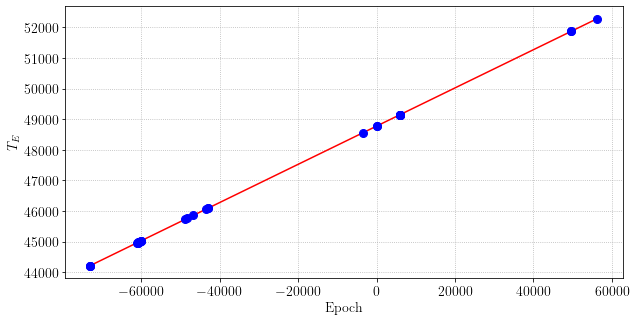

In [8]:
#Plotgraph
fig=plt.figure(figsize=(10, 5))
plt.errorbar(x, y, yerr= dy, fmt='o', markersize=8, color='blue', ecolor='lightgray')
# create a line plot for the mapping function
plt.plot(x_line, y_line, '-', color='red')
#plt.plot(BJD_time, OC_s_ecc, lw=2, color='black')
#plt.xlim(-6000,6000)
#plt.ylim(-200,200)
#plt.ylim(-40,60)
plt.xlabel('Epoch')
plt.ylabel('$T_{E}$')
plt.grid(linestyle='dotted')
#####plt.title('O-C diagram: DP Leo')
#output_filename = os.path.splitext(__file__)[0] + '.png'
#plt.savefig(output_filename, dpi=1000)
plt.show()

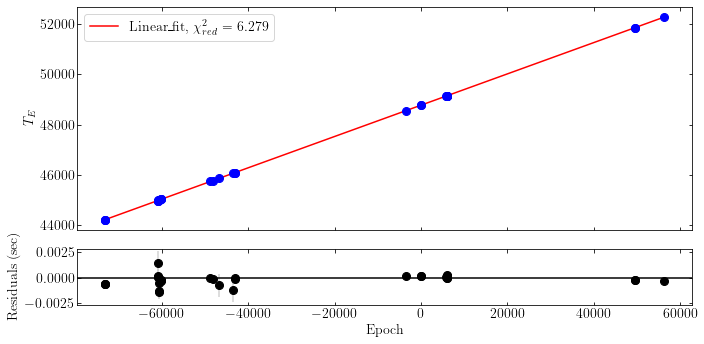

In [9]:
fig, (ax0, ax1) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [4, 1]}, sharex=True, sharey=False, figsize=(10, 5), tight_layout=True)
plt.xlabel('Epoch')

ax0.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')
ax1.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')

ax0.errorbar(x, y, yerr= dy, fmt='o', markersize=8, color='blue', ecolor='lightgray')
ax0.plot(x_line, y_line, '-', color='red',label='Linear\_fit, $\chi_{red}^{2}$ = '+str('%0.3f' %(Reduced_chisq_ln)))

ax0.legend(loc="best")
ax0.set_ylabel('$T_{E}$')
ax1.set_ylabel('Residuals (sec)')


ax1.errorbar(x, Residual, yerr= dy, fmt='o', markersize=8, color='black', ecolor='lightgray')
ax1.axhline(y=0, color='black', linestyle='-')
plt.savefig("Schwope_ephemeris_determination_linear.pdf", dpi=1000)

plt.show()

### Perform the O-C diagram from Schwope data

In [10]:
T0_bjd = 48773.215071
T0_bjd_err = 0.000018
P0_day = 0.06236283691
P0_day_err = 0.00000000070

In [11]:
#Please change the input file
DP_Leo_bjd = open("oc_dpleo_Schwope_2002.inp",'r').readlines()
N_dpleo_bjd = len(DP_Leo_bjd)

#Read datat
Cycle = []
T_obs = []
T_obs_err = []
#Please change the input file
for line in open("oc_dpleo_Schwope_2002.inp"):
#for line in open("T_mid_Beuermann_Schwope.in"):
    li=line.strip()
    if not li.startswith("#"):
        Cycle.append(float(li.split(" ")[0]))
        T_obs.append(float(li.split(" ")[1]))
        T_obs_err.append(float(li.split(" ")[2]))

In [12]:
BJD_time_a = [i for i in range(N_dpleo_bjd)]
Delta_aT = [i for i in range(N_dpleo_bjd)]
Delta_aT_err = [i for i in range(N_dpleo_bjd)]
E_af = [i for i in range(N_dpleo_bjd)] #float number
E_ak = [i for i in range(N_dpleo_bjd)] #integer number
E_aj = [i for i in range(N_dpleo_bjd)] #integer number
P_aE = [i for i in range(N_dpleo_bjd)]
P_err_aE = [i for i in range(N_dpleo_bjd)]
T_aC_linear = [i for i in range(N_dpleo_bjd)]
T_aO_linear = [i for i in range(N_dpleo_bjd)]
P_aver_a = [i for i in range(N_dpleo_bjd)]
P_aver_std_a = [i for i in range(N_dpleo_bjd)]

In [13]:
OC_cal = []
#print ('-----------------------------------------------------------------------------')
#print ('Cycle \t\t T_O \t   T_C \t\t BJD - 2450000 \t OC_lin OC_err_Lin OC_occ')
print('No. \t BJD_time \t Cycle \t T_O_linear \t T_C_linear \t OC_s \t\t OC_s_err')
#print ('-----------------------------------------------------------------------------')
for i in range (0,N_dpleo_bjd):
    BJD_time = np.array(T_obs)
    BJD_time_a[i] = BJD_time
    Delta_T = np.array(T_obs) - np.array(T0_bjd)
    Delta_aT[i] = Delta_T #arrays
    Delta_T_err = np.sqrt((np.array(T_obs_err)/np.array(T_obs))**2 + (np.array(T0_bjd_err)/np.array(T0_bjd))**2)
    E_k = Cycle
    E_ak[i] = E_k #arrays
    #    print (Delta_T_err[i])
    E_f = Delta_T / P0_day                      #Calculate cycle with float number
    ##    print (E_f)                                 #print cycle with float number
    E_af[i] = E_f #arrays
    E_j = np.round(Delta_T / P0_day)           #Calculate cycle with integer number
##print (Delta_T)
    if  E_j[i] != 0:
        P_E_day = Delta_T[i] / E_j[i]
        P_aE[i] = P_E_day
        P_E_err_day = np.abs((np.array(T_obs_err[i]) - np.array(T0_bjd_err)) / E_j[i])
        P_err_aE[i] = P_E_err_day
        T_O_linear = T0_bjd + P_aE[i]*E_j[i]               #Linear
        T_aO_linear[i] = T_O_linear #arrays
    else:
        E_k[i] = 1
        P_E_day = Delta_T[i] / E_k[i]
#        print (P_E_day)
        P_aE[i] = P_E_day
        P_E_err_day = np.abs((np.array(T_obs_err[i]) - np.array(T0_bjd_err)) / E_k[i])
        P_err_aE[i] = P_E_err_day
        T_O_linear = T0_bjd + P_aE[i]*E_k[i]               #Linear
        T_aO_linear[i] = T_O_linear #arrays
#    print ('%0.6f' %(T_O))
#print (E_j)                                #print cycle with integer number
    if  E_j[i] != 0:
        P_E_day = Delta_T[i] / E_j[i]
        P_aE[i] = P_E_day
        P_E_err_day = np.abs((np.array(T_obs_err[i]) - np.array(T0_bjd_err)) / E_j[i])
#        print (P_E_err_day)
        P_err_aE[i] = P_E_err_day
        T_C_linear = T0_bjd + P0_day*E_j[i]              #Linear
        T_aC_linear[i] = T_C_linear #arrays
#    print (T_O, T_C)
        OC = np.array(T_O_linear) - np.array(T_C_linear)
        OC_s = (np.array(T_O_linear) - np.array(T_C_linear))*24*60*60
        OC_err = np.abs(np.sqrt((np.array(P_err_aE[i])**2 + (np.array(P0_day_err)**2))) * np.array(E_j[i]))
#        print (OC_err)
        OC_s_err = OC_err*24*60*60
    else:
        P_E_day = Delta_T[i] / E_k[i]
        P_aE[i] = P_E_day
        P_E_err_day = np.abs((np.array(T_obs_err[i]) - np.array(T0_bjd_err)) / E_k[i])
        P_err_aE[i] = P_E_err_day
        T_C_linear = T0_bjd + P0_day*E_j[i]              #Linear
        T_aC_linear[i] = T_C_linear #arrays
#    print (T_O, T_C)
        OC = np.array(T_O_linear) - np.array(T_C_linear)
        OC_s = (np.array(T_O_linear) - np.array(T_C_linear))*24*60*60
        OC_err = np.abs(np.sqrt((np.array(P_err_aE[i])**2)) *np.array(E_k[i]))
#        print (OC_err)
        OC_s_err = OC_err*24*60*60
    print ('%0.0f\t%0.6f\t%0.0f\t%0.6f\t%0.6f\t%0.6f\t%0.6f' %(i, BJD_time[i], Cycle[i], T_O_linear, T_C_linear, OC_s, OC_s_err))
    OC_cal.append('%0.6f\t%0.0f\t%0.6f\t%0.6f\t%0.6f\t%0.6f' %(BJD_time[i], Cycle[i], T_O_linear, T_C_linear, OC_s, OC_s_err))
    
rerults = OC_cal
f = open('oc_linear_dpleo_Beuermann_Schwope_Kittipong_ephemeris_determination.txt', 'w')
#for upper_result in upper_result:
for i in range(len(rerults)):
    f.write(str(rerults[i])+ '\n')
f.close()

No. 	 BJD_time 	 Cycle 	 T_O_linear 	 T_C_linear 	 OC_s 		 OC_s_err
0	44214.553250	-73099	44214.553250	44214.554056	-69.613855	14.152934
1	44214.615620	-73098	44214.615620	44214.616419	-68.994964	14.152915
2	44214.677980	-73097	44214.677980	44214.678781	-69.240073	14.152897
3	44968.023090	-61017	44968.023090	44968.021851	107.026918	98.514167
4	44968.957120	-61002	44968.957120	44968.957294	-15.017718	98.514133
5	44969.019620	-61001	44969.019620	44969.019657	-3.166827	98.514131
6	44978.997550	-60841	44978.997550	44978.997711	-13.872271	98.513769
7	44993.900780	-60602	44993.900780	44993.902429	-142.437327	58.559231
8	44993.963280	-60601	44993.963280	44993.964791	-130.586436	58.559227
9	44994.026420	-60600	44994.026420	44994.027154	-63.439545	58.559223
10	45020.905130	-60169	45020.905130	45020.905537	-35.161535	18.800223
11	45021.902920	-60153	45021.902920	45021.903342	-36.491280	18.800036
12	45024.833860	-60106	45024.833860	45024.834396	-46.283404	58.557361
13	45731.966400	-48767	45731.96

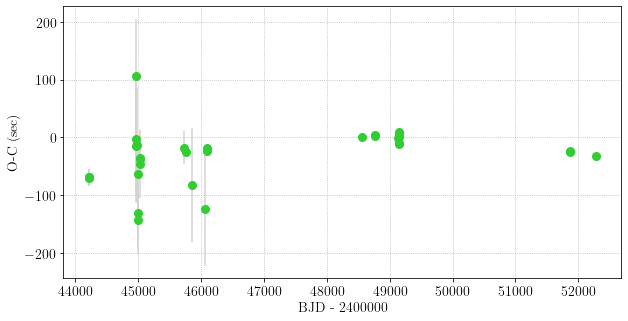

In [14]:
#Plot O-C vs BJD
InputFileInput  = 'oc_linear_dpleo_Beuermann_Schwope_Kittipong_ephemeris_determination.txt'
Data   = np.genfromtxt(InputFileInput)
Cycle = Data[:,0]
T_O = Data[:,1]
T_C = Data[:,2]
BJD_time = Data[:,3]
OC_s = Data[:,4]
OC_s_err = Data[:,5]

##Plotgraph
fig=plt.figure(figsize=(10, 5))
plt.errorbar(BJD_time, OC_s, yerr=OC_s_err, fmt='o', markersize=8, color='limegreen', ecolor='lightgray')
#plt.xlim(4850,5450)
#plt.ylim(-50,60)
plt.xlabel('BJD - 2400000')
plt.ylabel('O-C (sec)')
plt.grid(linestyle='dotted')
######plt.title('O-C diagram: DP Leo')
#output_filename = os.path.splitext(__file__)[0] + '.png'
#plt.savefig(output_filename, dpi=1000)
plt.show()

In [15]:
Epoch = (BJD_time - T0_bjd)/P0

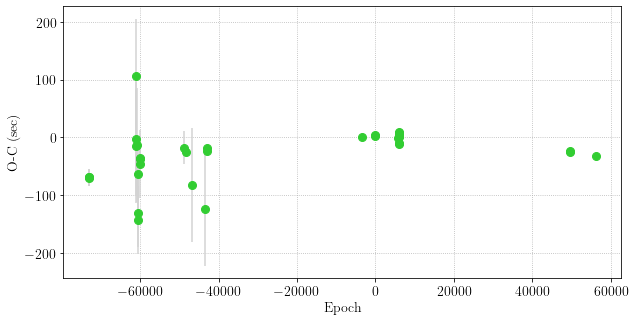

In [16]:
##Plotgraph
fig=plt.figure(figsize=(10, 5))
plt.errorbar(Epoch, OC_s, yerr=OC_s_err, fmt='o', markersize=8, color='limegreen', ecolor='lightgray')
#plt.xlim(4850,5450)
#plt.ylim(-50,60)
plt.xlabel('Epoch')
plt.ylabel('O-C (sec)')
plt.grid(linestyle='dotted')
######plt.title('O-C diagram: DP Leo')
#output_filename = os.path.splitext(__file__)[0] + '.png'
#plt.savefig(output_filename, dpi=1000)
plt.show()

### Calculate the model using Schwope data

In [17]:
T0 = T0_bjd
P_orb = P0_day
P_dot = -4.4e-12
#print(P_dot)

In [19]:
T_cal = T0 + P_orb*Epoch + (1/2)*P_orb*P_dot*Epoch*Epoch
print(T_cal)

print(len(T_cal))

[44214.55342329 44214.61578631 44214.67814832 44968.02142401
 44968.95686724 44969.01923025 44978.99728671 44993.90200836
 44993.96437038 44994.02673339 45020.90512294 45021.90292818
 45024.83398289 45731.96634369 45763.83375979 45854.88351883
 46054.9435352  46086.9356756  46086.99803861 48560.55780009
 48773.215071   48774.21287598 49137.91292828 49143.96212299
 49144.02448598 49144.08684898 49144.95992894 49145.02229193
 49145.08465393 49145.14701693 51870.7767733  51870.90149927
 52284.67881668]
33


In [22]:
OC_cal1 = []
#print ('-----------------------------------------------------------------------------')
#print ('Cycle \t\t T_O \t   T_C \t\t BJD - 2450000 \t OC_lin OC_err_Lin OC_occ')
print('No. \t BJD_time \t Cycle \t T_O_linear \t T_C_linear \t OC_s \t\t OC_s_err')
#print ('-----------------------------------------------------------------------------')
for i in range (0,N_dpleo_bjd):
    BJD_time = np.array(T_obs)
    BJD_time_a[i] = BJD_time
    Delta_T = np.array(T_cal) - np.array(T0_bjd)
    Delta_aT[i] = Delta_T #arrays
    Delta_T_err = np.sqrt((np.array(T_obs_err)/np.array(T_obs))**2 + (np.array(T0_bjd_err)/np.array(T0_bjd))**2)
    E_k = Cycle
    E_ak[i] = E_k #arrays
    #    print (Delta_T_err[i])
    E_f = Delta_T / P0_day                      #Calculate cycle with float number
    ##    print (E_f)                                 #print cycle with float number
    E_af[i] = E_f #arrays
    E_j = np.round(Delta_T / P0_day)           #Calculate cycle with integer number
#    print (Delta_T[i])

No. 	 BJD_time 	 Cycle 	 T_O_linear 	 T_C_linear 	 OC_s 		 OC_s_err
-4558.661647712652
-4558.59928469397
-4558.536922675281
-3805.193646992644
-3804.2582037621396
-3804.195840746768
-3794.2177842918827
-3779.313062637986
-3779.250700622739
-3779.1883376074766
-3752.3099480581004
-3751.312142815943
-3748.3810881050304
-3041.2487273063743
-3009.3813112061107
-2918.3315521715995
-2718.271535796892
-2686.2793954019144
-2686.217032391469
-212.65727091173176
0.0
0.9978049779892899
364.6978572757507
370.7470519855706
370.8094149825629
370.8717779795552
371.74485793745407
371.80722093445365
371.8695829314456
371.93194592843065
3097.5617022954975
3097.686428265486
3511.463745678564


In [58]:
N = 700
x_range = [i for i in range(N)]
x_range_a = [i for i in range(N)]
y_range = [i for i in range(len(x_range))]
step=1*100
#step

interporate = []
for i in range(300, N):
    x_range[i] = i*step
    x_range_a[i] = x_range
    Epoch = np.round((x_range[i] - T0)/P_orb)
    y_range[i] = P_orb*Epoch + T0 + P_dot*Epoch*Epoch
    

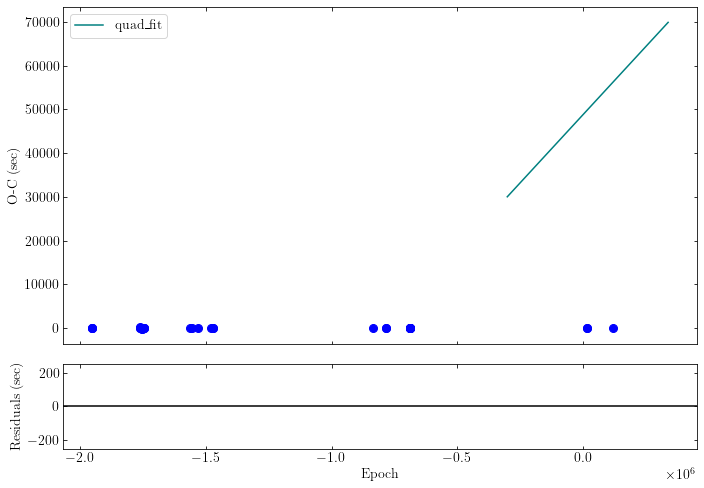

In [48]:
fig, (ax0, ax1) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [4, 1]}, sharex=True, sharey=False, figsize=(10, 7), tight_layout=True)
plt.xlabel('Epoch')

ax0.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')
ax1.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')

ax0.errorbar((x-T0)/P_orb, OC_s, yerr= OC_s_err, fmt='o', markersize=8, color='blue', ecolor='lightgray')
ax0.plot(Epoch_range_lnquad, y_range_lnquad, '-', color='teal',label='quad\_fit')
ax0.legend(loc="best")
ax0.set_ylabel('O-C (sec)')
ax1.set_ylabel('Residuals (sec)')

ax1.set_ylim(-250,250)

#ax1.errorbar((x-T0)/P_orb, Res_lnquad_fit, yerr= dy, fmt='o', markersize=8, color='black', ecolor='lightgray')
ax1.axhline(y=0, color='black', linestyle='-')
#plt.savefig("2022_May_week4_Schwope_Schwope_ephemeris_lnquad.pdf", dpi=1200)
plt.show()

In [15]:
# Ephemeris: B
BJD0 = T0_bjd
dBJD0 = T0_bjd_err
P0 = P0_day
dP0 = P0_day_err

x = np.array(BJD_time)
t = np.array(BJD_time)
Epoch = np.array((x - BJD0))/P0
y = np.array(OC_s)
dy = np.array(OC_s_err)

len_x = len(x)

#print(Epoch)
print(x)
#print(BJD0)

print(len_x)

[44214.55383  44214.616193 44214.678556 44968.021642 44968.957085
 44969.019448 44978.997502 44993.90222  44993.964583 44994.026946
 45020.905329 45021.903135 45024.834188 45731.966411 45763.833822
 45854.883566 46054.943551 46086.935687 46086.99805  48560.557667
 48773.214946 48774.212751 49137.912824 49143.96202  49144.024382
 49144.086745 49144.959825 49145.022188 49145.084551 49145.146913
 51870.777123 51870.901849 52284.679281]
33


In [16]:
def quad_fit(x,m,c,Q):
    Epoch = (x - T0_bjd)/P0_day 
    return m*Epoch + c + Q*Epoch*Epoch

In [17]:
import scipy.optimize as optimization  
#guess = (m,c,Q)
#params, params_covariance = optimization.curve_fit(quad_fit, x, y,sigma=dy, absolute_sigma=False,p0=guess)

params, params_covariance = optimization.curve_fit(quad_fit, x, y,sigma=dy, absolute_sigma=False)

m = params[0]
c = params[1]
Q = params[2]

dm = params_covariance[0,0]
dc = params_covariance[1,1]
dQ = params_covariance[2,2]

oc_quad_fit = quad_fit(x,*params)

In [18]:
#The ephemeris from above
T0 = T0_bjd
dT0 = T0_bjd_err
P0 = P0_day
dP0 = P0_day_err


#print('The fitting parameters:')
##T
T = c/(24*60*60) + T0
dT = np.sqrt((((dc**(0.5))/(24*60*60))**2) + (dT0**2))
#T = BJD0
#print('T0 (BJD):',T)
#print('dT0 (BJD):',dT)

##P
Period = (m/(24*60*60)) + P0
dPeriod = np.sqrt((((dm**(0.5))/(24*60*60))**2) + (dP0**2))
#print('P0 (days):',Period)
#print('dP0 (days):',dPeriod)


#Period decrease
P_dot = 2*Q/(P0*24*60*60)
dP_dot = (2*(P0*24*60*60)*(dQ**0.5) - 2*Q*(dP0*24*60*60))/((P0*24*60*60)**2)
#print('P_dot (s/s):',P_dot)
#print('dP_dot (s/s):',dP_dot)

print("The fitting parameters:")
print('T0 = '+str('%0.7f' %(T)),'+/-', str('%0.5f' %(dT)), "[days]")
print('P_bin = '+str('%0.10f' %(Period)),'+/-', str('%0.10f' %(dPeriod)), "[days]")
print('P_dot = '+str('%0.13f' %(P_dot)),'+/-', str('%0.13f' %(dP_dot)), "[s/s]")

The fitting parameters:
T0 = 48773.2150841 +/- 0.00002 [days]
P_bin = 0.0623628373 +/- 0.0000000004 [days]
P_dot = -0.0000000000042 +/- 0.0000000000003 [s/s]


In [19]:
x_min, x_max = np.amin(x), np.amax(x)
x_line = np.linspace(x_min, x_max)
#print(len(x_line))
y_line = quad_fit(x_line, *params) #### For all interporation 
ys = quad_fit(x, *params)

#print(len(y_line))
#print(len(ys))

Res_lnquad_fit = y - ys
np.savetxt("2022_May_week4_Schwope_Schwope_ephemeris_lnquad.out", np.c_[x, Res_lnquad_fit, dy])

#np.savetxt('TNO_ephemeris_determination_1.out', np.c_[x_line, y_line, y, dy], fmt="%.5f")

#Reduced_chisqrt
m = 3
dof = len_x - m
Chi_sqr = ((y - ys)**2/(dy)**2)/dof
Reduced_chisq_lnquad= sum(Chi_sqr)
print(Reduced_chisq_lnquad)

0.9167706206473418


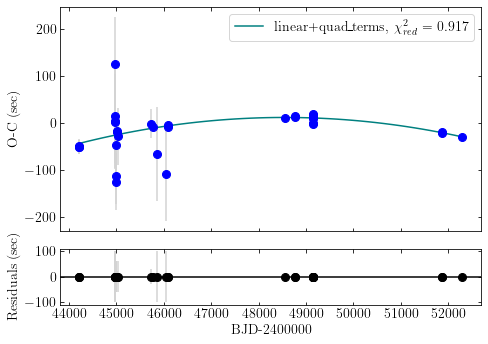

In [20]:
N_BMJD = 2400000
fig, (ax0, ax1) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [4, 1]}, sharex=True, sharey=False, figsize=(7, 5), tight_layout=True)
plt.xlabel('BJD-'+str(N_BMJD))

ax0.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')
ax1.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')

ax0.errorbar(x, y, yerr= dy, fmt='o', markersize=8, color='blue', ecolor='lightgray')
ax0.plot(x_line, y_line, '-', color='teal',label='linear+quad\_terms, $\chi_{red}^{2}$ = '+str('%0.3f' %(Reduced_chisq_lnquad)))

#ax0.set_ylim(-40,60)

ax0.set_ylabel('O-C (sec)')
ax1.set_ylabel('Residuals (sec)')

ax1.errorbar(x, Residual, yerr= dy, fmt='o', markersize=8, color='black', ecolor='lightgray')

ax1.axhline(y=0, color='black', linestyle='-')
ax0.legend(loc="best")

#plt.savefig("2022_Feb_week4_new_ephemeris_sin_fit_Res.jpg", dpi=1000)

plt.show()

In [21]:
N = 700
x_range = [i for i in range(N)]
x_range_a = [i for i in range(N)]
y_range = [i for i in range(len(x_range))]
step=1*100
#step

interporate = []
for i in range(300, N):
    x_range[i] = i*step
    x_range_a[i] = x_range
    Epoch = np.round((x_range[i] - T)/Period)
    y_range[i] = quad_fit(x_range[i], *params)
#    print(x_range[i], y_range[i], Epoch)
    interporate.append('%0.0f %0.2f %0.10f %0.10f %0.0f %0.5f' %(i, x_range[i], T, Period, Epoch, y_range[i]))
    
data_out = interporate
f = open("interporate_lnquad_fit.out", 'w')
for i in range(len(data_out)):
    f.write(str(data_out[i])+ '\n')
f.close()

InputFile_out = "interporate_lnquad_fit.out"
Data_out   = np.genfromtxt(InputFile_out)

#Read the wd data: BJD vs. Relative flux
x_range_lnquad = Data_out[:,1]
Epoch_range_lnquad = Data_out[:,4]
y_range_lnquad = Data_out[:,5]

#print(y_range)

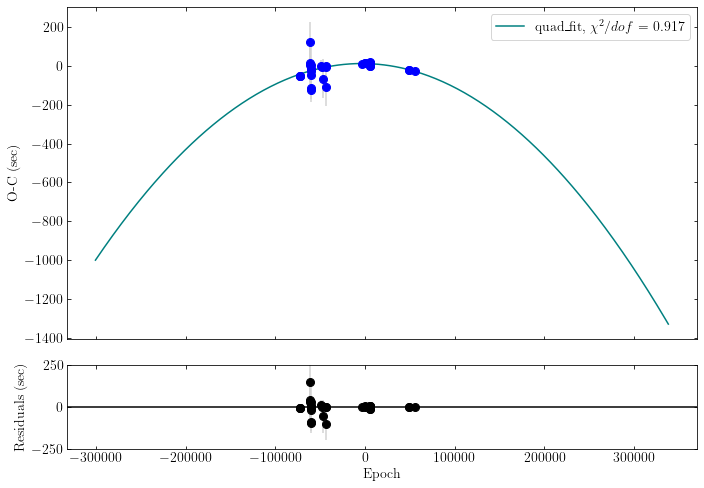

In [22]:
fig, (ax0, ax1) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [4, 1]}, sharex=True, sharey=False, figsize=(10, 7), tight_layout=True)
plt.xlabel('Epoch')

ax0.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')
ax1.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')

ax0.errorbar((x-T)/Period, y, yerr= dy, fmt='o', markersize=8, color='blue', ecolor='lightgray')
ax0.plot(Epoch_range_lnquad, y_range_lnquad, '-', color='teal',label='quad\_fit, $\chi^{2}/dof$ = '+str('%0.3f' %(Reduced_chisq_lnquad)))
ax0.legend(loc="best")
ax0.set_ylabel('O-C (sec)')
ax1.set_ylabel('Residuals (sec)')

ax1.set_ylim(-250,250)

ax1.errorbar((x-T)/Period, Res_lnquad_fit, yerr= dy, fmt='o', markersize=8, color='black', ecolor='lightgray')
ax1.axhline(y=0, color='black', linestyle='-')
plt.savefig("2022_May_week4_Schwope_Schwope_ephemeris_lnquad.pdf", dpi=1200)
plt.show()